## Exercício 1: Vestibular

Considere que a os dados gerados na célula abaixo contêm o número de acertos de 100 alunos em um vestibular para um curso de exatas, divididas pelos respectivos assuntos. Considere que cada assunto possui um número de questões conforme a tabela abaixo:

| assunto | número de questões |
|:---:|:---:|
| Matemática | 24 |
| Português | 18 |
| Geografia | 8 |
| Inglês | 8 |
| História | 8 |
| Física | 12 |
| Química | 12 |

Usando os comandos de operações com DataFrames que você aprendeu na Aula 03, calcule:

1. (operações com escalar) Calcule o percentual de acerto dos alunos por assunto.  
2. (operações entre *DataFrames) Calcule o total de acertos de cada aluno.  
3. Calcule o porcentual geral de cada aluno.  
4. Suponha que a nota de corte para a segunda fase seja 45. Quantos alunos tiveram nota maior que 45?  

In [10]:
import numpy as np
import pandas as pd
import seaborn

seaborn.set()

In [199]:
np.random.seed(42)

materias = {
    'mat' : 24,
    'por' : 18,
    'geo' : 8,
    'ing' : 8,
    'his' : 8,
    'fis' : 12,
    'qui' : 12,
}

for materia, limite_acertos in materias.items():
    dataframes[materia] = pd.DataFrame(np.random.randint(limite_acertos, size=(100, 1)), columns=['Acertos'])

df_mat = dataframes['mat']
df_por = dataframes['por']
df_geo = dataframes['geo']
df_ing = dataframes['ing']
df_his = dataframes['fis']
df_fis = dataframes['mat']
df_qui = dataframes['qui']

In [200]:
#1) 
df_mat_percentual = df_mat.copy()
df_mat_percentual['%'] = (df_mat_percentual['Acertos']/24)*100

df_por_percentual = df_por.copy()
df_por_percentual['%'] = (df_por_percentual['Acertos']/18)*100

df_geo_percentual = df_geo.copy()
df_geo_percentual['%'] = (df_geo_percentual['Acertos']/8)*100

df_ing_percentual = df_ing.copy()
df_ing_percentual['%'] = (df_ing_percentual['Acertos']/8)*100

df_his_percentual = df_his.copy()
df_his_percentual['%'] = (df_his_percentual['Acertos']/8)*100

df_fis_percentual = df_fis.copy()
df_fis_percentual['%'] = (df_fis_percentual['Acertos']/12)*100

df_qui_percentual = df_qui.copy()
df_qui_percentual['%'] = (df_qui_percentual['Acertos']/12)*100

In [201]:
#2) 
soma = df_mat+df_por+df_geo+df_ing+df_his+df_fis+df_qui
soma.head(2)

,Acertos
0,40
1,67


In [202]:
#3) 
soma['%'] = (soma['Acertos']/(24+18+8+8+8+12+12))*100
soma.head(2)

,Acertos,%
0,40,44.444444
1,67,74.444444


In [203]:
#4) 
aprovados = soma.loc[:, 'Acertos'] > 50
soma[aprovados].count()

Acertos    42
%          42
dtype: int64

## 2) Vestibular II

Ainda sobre o mesmo banco de dados:

1. Neste vestibular, quem 'zera' em matemática, física ou química está desqualificado. Monte um novo *DataFrame* com os alunos desqualificados por este critério.
2. Quantos são esses alunos?
3. Qual a média desses alunos em história e geografia?
4. Monte um *DataFrame* com os alunos que passaram para a segunda fase. Repare que estes alunos não podem ter sido desqualificados.

In [211]:
reprovado = df_mat['Acertos'] == 0

reprovado1 = df_fis['Acertos'] == 0

reprovado2 = df_qui['Acertos'] == 0

print(f'{df_mat[reprovado].count()+df_mat[reprovado1].count()+df_mat[reprovado2].count()} alunos reprovados')

Acertos    15
dtype: int64 alunos reprovados


## 3) Vacinações no Acre
Vamos trabalhar agora com a base de vacinações no Acre. Para facilitar a sua vida, copiamos o link do arquivo na célula abaixo.

1. Quantas vacinas estão registradas nessa base?  
2. Quantos pacientes foram vacinados? (considere um paciente para cada valor único de ```paciente_id```)  
3. Quantos pacientes únicos tomaram a primeira dose? OBS: Há um caractere especial neste campo. Receba os valores do campo com o método ```.unique()```.   
4. Quantos pacientes com menos de 18 anos foram vacinados?  
5. Quantos estabelecimentos aplicaram vacina no Acre?


**OBS:** O portal do DATASUS pode apresentar instabilidades, retornando um erro na segunda célula abaixo. Por este motivo está disponível uma base estática, que se for baixada para o seu *working directory* pode ser lida com este comando: ```df = pd.read_csv('registros de vacinacao covid ACRE.csv', sep=';')```.

**OBS2:** Para saber qual é o seu working directory, rode no jupyter: ```!pwd```.

In [4]:
df = pd.read_csv('covid_acre.csv', sep=';')

In [5]:
#1)
df['vacina_nome'].unique()

array(['Covid-19-Coronavac-Sinovac/Butantan',
       'Vacina Covid-19 - Covishield', 'Covid-19-AstraZeneca',
       'Vacina covid-19 - BNT162b2 - BioNTech/Fosun Pharma/Pfizer',
       'Vacina covid-19 - Ad26.COV2.S - Janssen-Cilag'], dtype=object)

In [6]:
df['vacina_nome'].nunique()

5

In [7]:
#2)
df['paciente_id'].nunique()

120517

In [8]:
df_sem_dup = df.drop_duplicates(subset='paciente_id', keep='first')
nao_vacinados = df['vacina_dataaplicacao'].isnull().any()
nao_vacinados

False

<Axes: xlabel='vacina_descricao_dose'>

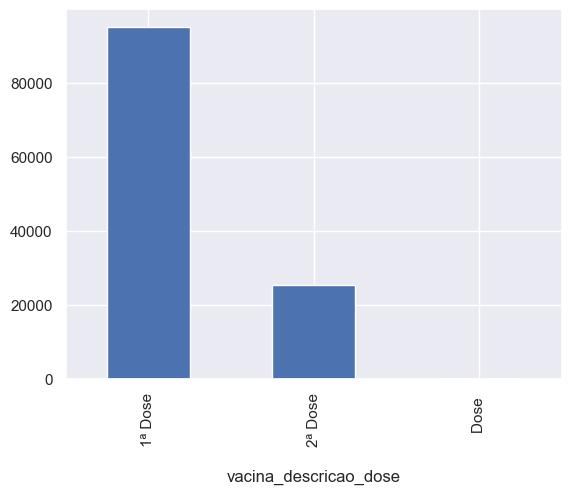

In [13]:
#4)
df_sem_dup.loc[:, 'vacina_descricao_dose'].value_counts().plot(kind='bar')

In [42]:
menores_idade = df_sem_dup['paciente_idade'] < 18
maiores_idade = df_sem_dup['paciente_idade'] >= 18

len(df_sem_dup[maiores_idade])
len(df_sem_dup[menores_idade])


47

In [44]:
#5)

df.head(2)

,document_id,paciente_id,paciente_idade,paciente_datanascimento,paciente_enumsexobiologico,paciente_racacor_codigo,paciente_racacor_valor,paciente_endereco_coibgemunicipio,paciente_endereco_copais,paciente_endereco_nmmunicipio,...,vacina_lote,vacina_fabricante_nome,vacina_fabricante_referencia,vacina_dataaplicacao,vacina_descricao_dose,vacina_codigo,vacina_nome,sistema_origem,data_importacao_rnds,id_sistema_origem
0,b19cd280-474c-4c22-a35d-8c06bc04a4e0-i0b0,2e091c9a37d3f50d1d705fc80c6448c6fc69b44da9e936...,69,1951-12-28,F,3,PARDA,120050.0,10.0,SENA MADUREIRA,...,210052A,FUNDACAO BUTANTAN,Organization/61189445000156,2021-03-23,1ª Dose,86,Covid-19-Coronavac-Sinovac/Butantan,Novo PNI,2021-03-25T03:27:19.000Z,NaN
1,a1acc0b6-1cf6-4c4b-adcb-06b473a0faaf-i0b0,f4e17a9e5354cb45e223d85eda02fb2f76048c801675f5...,81,1939-11-22,M,3,PARDA,120040.0,10.0,RIO BRANCO,...,210110,FUNDACAO BUTANTAN,Organization/61189445000156,2021-04-29,2ª Dose,86,Covid-19-Coronavac-Sinovac/Butantan,Novo PNI,2021-04-30T16:03:14.000Z,NaN


## 4) Vacinação II
Gere um *DataFrame* que contenha somente os estabelecimentos que aplicaram vcinas a menores de 18 anos. Nesse *DataFrame* devem conter somente os dados dos estabelecimentos, mais uma coluna sendo a quantidade de vacinas que o estabelecimento aplicou a menores de 18 anos.  
  
1. crie uma cópia do *DataFrame* original, contendo somente os registros de vacinas realizadas a menores de 18 anos.  
2. crie uma lista das colunas desse *DataFrame* com o atributo de *DataFrame* **.columns()**  
3. Nesse *DataFrame* faça uma contagem do campo ```vacina_categoria_nome```.
3. a partir da lista de colunas, escolha somente aquelas que são referentes ao estabelecimento, faça uma lista com esses valores.  
4. usando o método *.loc*, selecione somente essas variáveis  
5. Aplique o método **.drop_duplicates** e crie uma lista com uma linha para cada estabelecimento, com os dados do estabelecimento  